In [1]:
pip install matplotlib pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


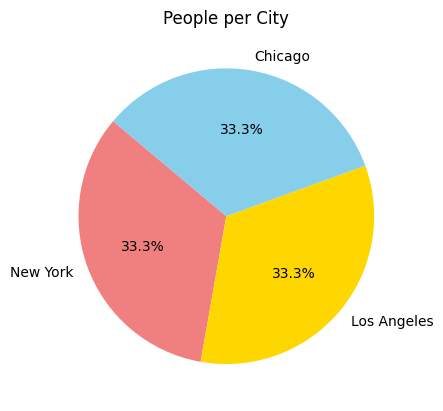

In [11]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def visualize_data(file_path):
    # CSV 파일 읽기
    df = pd.read_csv(file_path)
    
    # 나이 분포 그래프 그리기
    plt.figure(figsize=(8, 6))
    df['age'] = df['age'].astype(int)  # 나이를 정수형으로 변환
    plt.hist(df['age'], bins=5, color='skyblue', edgecolor='black')
    plt.title('Age Distribution', fontsize=16)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
    
    # 도시별 인원수 파이차트
    city_counts = df['city'].value_counts()
    plt.figure(figsize=(8, 6))
    city_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'gold', 'skyblue'])
    plt.title('People per City', fontsize=16)
    plt.ylabel('')  # Y축 제거
    plt.show()

In [3]:
import csv

# csv 파일 읽기
def read_csv(file_path):
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            print(row)

In [4]:
# 데이터 추가하기
def add_row(file_path):
    with open(file_path, mode = 'a', newline='') as file:
        writer = csv.writer(file)
        new_data = [input("ID: "), input("NAME: "), input("AGE: "), input("CITY: ")]
        writer.writerow(new_data)
        print("Data added successfully!")

In [5]:
# 데이터 삭제하기
def delete_row(file_path, delete_id):
    rows = []
    with open(file_path, mode = 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['id'] != delete_id:
                rows.append(row)

    # 파일 업데이트
    with open(file_path, mode = 'r') as file:
        writer = csv.DictReader(file, fieldnames=rows[0].keys())
        writer.writeheader()
        writer.writerows(rows)
        print(f"Row with ID {delete_id} deleted.")

In [6]:
# 데이터 수정하기
def update_row(file_path, update_id, field, new_value):
    rows = []
    with open(file_path, mode = 'r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row['id'] == update_id:
                row[field] = new_value
            rows.append(row)
    # 파일 업데이트
    with open(file_path, mode='w', newline='') as file:
        writer = csv.DictWriter(file, fieldnames=rows[0].keys())
        writer.writeheader()
        writer.writerows(rows)
        print(f"Row with ID {update_id} updated.")

In [7]:
# 데이터 검색하기
def search_data(file_path, field, value):
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)
        for row in reader:
            if row[field] == value:
                print(row)

In [9]:
def main():
    file_path = 'testing.csv'
    while True:
        print("\n1. Read CSV\n2. Add Row\n3. Delete Row\n4. Update Row\n5. Search Data\n6. Exit\n7. visualize.")
        choice = input("Enter your choice: ")

        if choice == '1':
            read_csv(file_path)
        elif choice == '2':
            add_row(file_path)
        elif choice == '3':
            delete_id = input("Enter ID to delete: ")
            delete_row(file_path, delete_id)
        elif choice == '4':
            update_id = input("Enter ID to update: ")
            field = input("Enter field to update (name, age, city): ")
            new_value = input("Enter new value: ")
            update_row(file_path, update_id, field, new_value)
        elif choice == '5':
            field = input("Enter field to search (name, age, city): ")
            value = input("Enter value to search: ")
            search_data(file_path, field, value)
        elif choice == '6':
            print("Exiting program.")
            break
        elif choice == '7':
            visualize_data(file_path)
        else:
            print("Invalid choice. Please try again.")

if __name__ == "__main__":
    main()


1. Read CSV
2. Add Row
3. Delete Row
4. Update Row
5. Search Data
6. Exit
7. visualize.


Enter your choice:  7


ParserError: Error tokenizing data. C error: Expected 3 fields in line 4, saw 6


In [ ]:
def open_file():
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if not file_path:
        return
    display_data(file_path)

def display_data(file_path):
    try:
        df = pd.read_csv(file_path)
        text_box.delete('1.0', tk.END)  # 기존 텍스트 초기화
        text_box.insert(tk.END, df.to_string(index=False))
    except Exception as e:
        messagebox.showerror("Error", f"Could not read file: {e}")

def visualize_file(file_path):
    try:
        df = pd.read_csv(file_path)
        # 도시별 인원수 파이차트
        city_counts = df['city'].value_counts()
        city_counts.plot.pie(autopct='%1.1f%%', startangle=140, colors=['lightcoral', 'gold', 'skyblue'])
        plt.title('People per City')
        plt.ylabel('')
        plt.show()
    except Exception as e:
        messagebox.showerror("Error", f"Could not visualize data: {e}")

def start_gui():
    global text_box
    root = tk.Tk()
    root.title("CSV File Manager")
    
    # 버튼
    open_button = tk.Button(root, text="Open CSV File", command=open_file)
    open_button.pack(pady=5)
    
    visualize_button = tk.Button(root, text="Visualize Data", command=lambda: visualize_file(filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])))
    visualize_button.pack(pady=5)
    
    # 텍스트 박스
    text_box = tk.Text(root, height=15, width=70)
    text_box.pack(pady=10)
    
    root.mainloop()

# 실행
if __name__ == "__main__":
    start_gui()